In [1]:
# cargamos las librerias a usar
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#se carga el dataset
dataHP = pd.read_csv('train_HP.csv')
dataHP.shape

(1460, 81)

In [3]:
##empezamos con la imputacion
#extraemos las columnas con vacios
cols_con_na = [col for col in dataHP.columns if (dataHP[col].isnull().mean() > 0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [4]:
#miramos las columnas que se pueden salvar
prop_nan_per_col = dataHP[cols_con_na].isnull().mean()
prop_nan_per_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [5]:
#columnas rescatables 
col_res= [col for col in dataHP.columns if (dataHP[col].isnull().mean() > 0 and dataHP[col].isnull().mean() < 0.05)]
col_res




['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

In [6]:
#porcentaje de nulos
dataHP[col_res].isnull().mean()

MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
dtype: float64

In [7]:
#vemos el tipo de dato
dataHP[col_res].dtypes


MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
dtype: object

In [8]:
#tratamos la varibale de tipo numero primero
dataHp = dataHP[['MasVnrArea','SalePrice']].copy()
media= dataHP['MasVnrArea'].mean()
mediana= dataHP['MasVnrArea'].median()
print(f"Media: {media}")
print(f"Median: {mediana}")


Media: 103.68526170798899
Median: 0.0


In [82]:
#Empezamos con las imputaciones
#cambiamos los nulos por los valores de mediana y media
dataHP['MasVnrArea_Mean'] = np.round(dataHP['MasVnrArea'].fillna(media))
dataHP['MasVnrArea_Median'] = np.round(dataHP['MasVnrArea'].fillna(mediana))

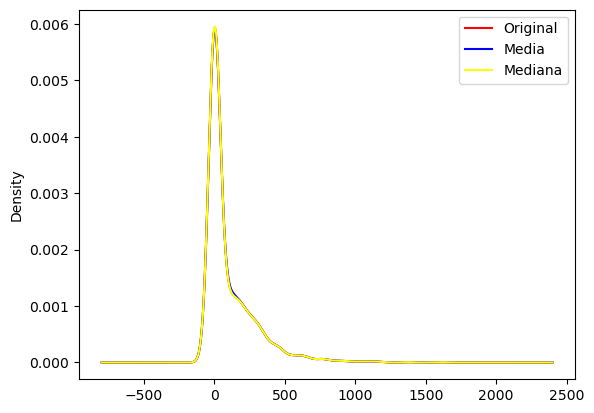

In [10]:
#graficamos como quedan los datos despues del cambio
# al ser tan pocos los faltantes la imputacion salio perfecta
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP['MasVnrArea'].plot.density(color='red', label='Original')
dataHP['MasVnrArea_Mean'].plot.density(color='blue', label='Media')
dataHP['MasVnrArea_Median'].plot.density(color='yellow', label='Mediana')
ax.legend()

In [92]:
#imputacion de la variable
dataHP['MasVnrArea'].fillna(media, inplace=True) 

In [17]:
#imputacion de categoricas
#funcion para obtner categoricas-
def getCategoryVars(dataset):
     cat_colnames = []
     colnames = dataset.columns
     for col in colnames:
          if(dataset[col].dtype == 'object'):
               cat_colnames.append(col)
     return cat_colnames



In [20]:
getCategoryVars(dataHP[col_res])

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

In [60]:
# seleccionamos variables categoricas
dataset_cat_missing= dataHP.copy()[['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical','SalePrice']]

In [61]:
dataset_cat_missing.isnull().mean()

MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
SalePrice       0.000000
dtype: float64

In [134]:
dataset_cat_missing['BsmtQual'].value_counts()/len(dataset_cat_missing)


TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

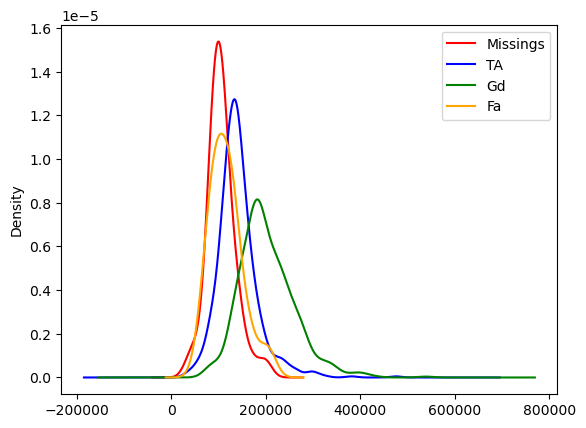

In [55]:
#miramos con que valor vamos a reemplazar los faltantes 
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Fa']['SalePrice'].plot(kind="kde", color="orange", label="Fa")
ax.legend()
plt.show()

In [85]:
#imputamos la primera variable el valor que mas se asemeja a la distribucion
dataHP['BsmtQual'].fillna('Fa', inplace=True) 

In [135]:
#miramos el comportamiento de la otra variable
dataset_cat_missing['MasVnrType'].value_counts()/len(dataset_cat_missing)

None       0.591781
BrkFace    0.304795
Stone      0.093151
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

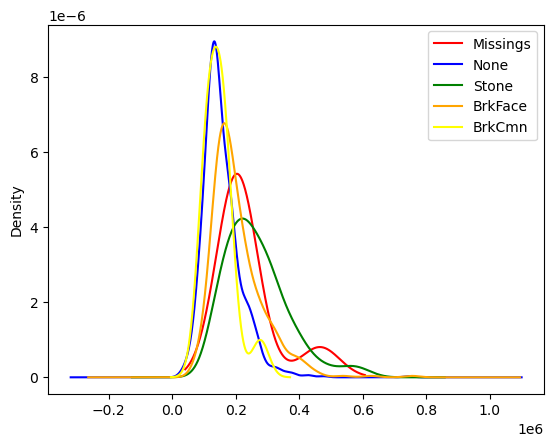

In [65]:
#miramos con que valor vamos a reemplazar los faltantes 
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['MasVnrType'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'None']['SalePrice'].plot(kind="kde", color="blue", label="None")
dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'Stone']['SalePrice'].plot(kind="kde", color="green", label="Stone")
dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'BrkFace']['SalePrice'].plot(kind="kde", color="orange", label="BrkFace")
dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'BrkCmn']['SalePrice'].plot(kind="kde", color="yellow", label="BrkCmn")                    
ax.legend()
plt.show()

In [86]:
#imputamos la primera variable el valor que mas se asemeja a la distribucion
dataHP['MasVnrType'].fillna('Stone', inplace=True) 

In [136]:
#miramos el comportamiento de la otra variable
dataset_cat_missing['BsmtCond'].value_counts()/len(dataset_cat_missing)

TA       0.897945
Gd       0.044521
Fa       0.030822
Stone    0.025342
Po       0.001370
Name: BsmtCond, dtype: float64

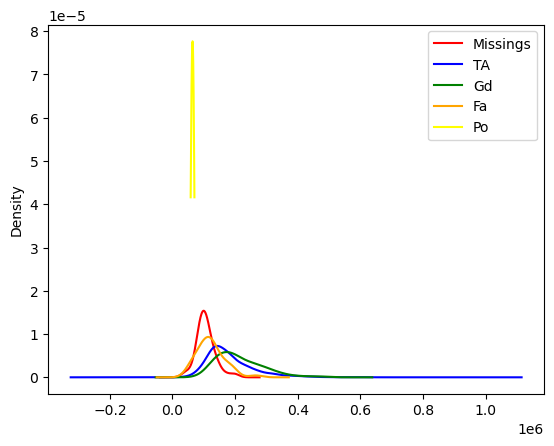

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtCond'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Fa']['SalePrice'].plot(kind="kde", color="orange", label="Fa")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Po']['SalePrice'].plot(kind="kde", color="yellow", label="Po")                    
ax.legend()
plt.show()

In [87]:
#imputamos la primera variable el valor que mas se asemeja a la distribucion
dataHP['BsmtCond'].fillna('Stone', inplace=True) 

In [137]:
#miramos el comportamiento de la otra variable
dataset_cat_missing['BsmtExposure'].value_counts()/len(dataset_cat_missing)

No    0.652740
Av    0.151370
Gd    0.117808
Mn    0.078082
Name: BsmtExposure, dtype: float64

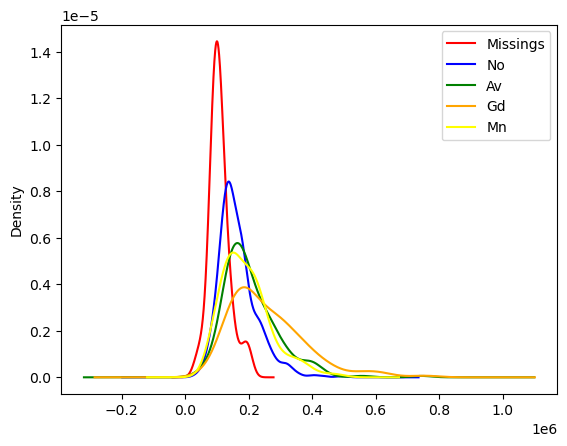

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtExposure'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'No']['SalePrice'].plot(kind="kde", color="blue", label="No")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Av']['SalePrice'].plot(kind="kde", color="green", label="Av")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Gd']['SalePrice'].plot(kind="kde", color="orange", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Mn']['SalePrice'].plot(kind="kde", color="yellow", label="Mn")                    
ax.legend()
plt.show()

In [88]:
#imputamos la primera variable el valor que mas se asemeja a la distribucion
dataHP['BsmtExposure'].fillna('Gd', inplace=True) 

In [138]:
#miramos el comportamiento de la otra variable
dataset_cat_missing['BsmtFinType1'].value_counts()/len(dataset_cat_missing)

Unf    0.294521
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.076027
Name: BsmtFinType1, dtype: float64

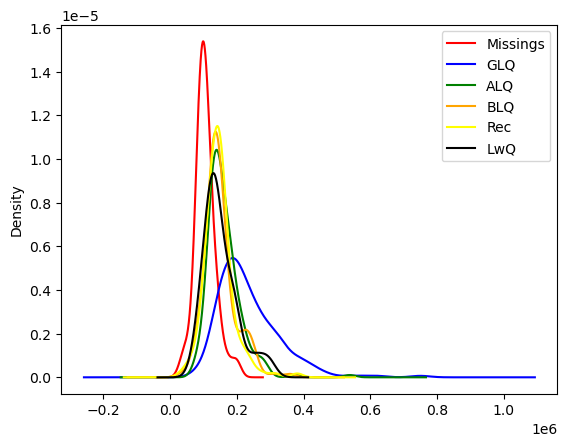

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtFinType1'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'GLQ']['SalePrice'].plot(kind="kde", color="blue", label="GLQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'ALQ']['SalePrice'].plot(kind="kde", color="green", label="ALQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'BLQ']['SalePrice'].plot(kind="kde", color="orange", label="BLQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'Rec']['SalePrice'].plot(kind="kde", color="yellow", label="Rec")  
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'LwQ']['SalePrice'].plot(kind="kde", color="black", label="LwQ")
ax.legend()
plt.show()

In [89]:
#imputamos la primera variable el valor que mas se asemeja a la distribucion
dataHP['BsmtFinType1'].fillna('LwQ', inplace=True) 

In [139]:
#miramos el comportamiento de la otra variable
dataset_cat_missing['BsmtFinType2'].value_counts()/len(dataset_cat_missing)

Unf    0.886301
Rec    0.036986
LwQ    0.031507
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64

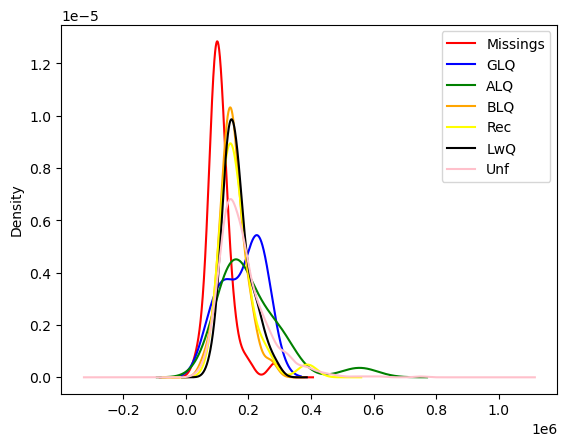

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtFinType2'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'GLQ']['SalePrice'].plot(kind="kde", color="blue", label="GLQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'ALQ']['SalePrice'].plot(kind="kde", color="green", label="ALQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'BLQ']['SalePrice'].plot(kind="kde", color="orange", label="BLQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'Rec']['SalePrice'].plot(kind="kde", color="yellow", label="Rec")  
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'LwQ']['SalePrice'].plot(kind="kde", color="black", label="LwQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'Unf']['SalePrice'].plot(kind="kde", color="pink", label="Unf")
ax.legend()
plt.show()

In [90]:
#imputamos la primera variable el valor que mas se asemeja a la distribucion
dataHP['BsmtFinType2'].fillna('Unf', inplace=True) 

In [81]:
###Terminamos con las imputaciones

In [114]:
## empezamos con las categorizaciones
#estas variables tienen un un numero muy grande de vacios así que las vamos a desechar 
#las variables que hicimos imputacion ya no aparecen acá porqué ya las llenamos
cols_rescatables = [col for col in dataHP.columns if (dataHP[col].isnull().mean() <= 0.05)]
cols_rescatables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [116]:
#dataset final para categorizar 
data_HP_noNAN = dataHP[cols_rescatables].dropna()
dataHP.shape, data_HP_noNAN.shape


((1460, 83), (1459, 72))

In [117]:
#validamos que no hayan vacios
[col for col in data_HP_noNAN.columns if (data_HP_noNAN[col].isnull().mean() > 0)]


[]

In [118]:
cols_cat = getCategoryVars(data_HP_noNAN)
cols_cat

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [125]:
#prueba
def categ(dataset,col):
    col_freq_mapper = (dataset[col].value_counts().sort_values(ascending=False)).to_dict()
    dataset[col] = dataset[col].map(col_freq_mapper)
    
    

In [126]:
for col in cols_cat:
     categ(data_HP_noNAN, col)

In [127]:
data_HP_noNAN

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MasVnrArea_Mean,MasVnrArea_Median,col_freq_mapper,None
0,1,60,1150,8450,1453,924,1310,1458,1051,1381,...,0,2,2008,1266,1197,208500,196.0,196.0,1197,1197
1,2,20,1150,9600,1453,924,1310,1458,47,1381,...,0,5,2007,1266,1197,181500,0.0,0.0,1197,1197
2,3,60,1150,11250,1453,484,1310,1458,1051,1381,...,0,9,2008,1266,1197,223500,162.0,162.0,1197,1197
3,4,70,1150,9550,1453,484,1310,1458,263,1381,...,0,2,2006,1266,101,140000,0.0,0.0,101,101
4,5,60,1150,14260,1453,484,1310,1458,47,1381,...,0,12,2008,1266,1197,250000,350.0,350.0,1197,1197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,1150,7917,1453,924,1310,1458,1051,1381,...,0,8,2007,1266,1197,175000,0.0,0.0,1197,1197
1456,1457,20,1150,13175,1453,924,1310,1458,1051,1381,...,0,2,2010,1266,1197,210000,119.0,119.0,1197,1197
1457,1458,70,1150,9042,1453,924,1310,1458,1051,1381,...,2500,5,2010,1266,1197,266500,0.0,0.0,1197,1197
1458,1459,20,1150,9717,1453,924,1310,1458,1051,1381,...,0,4,2010,1266,1197,142125,0.0,0.0,1197,1197


In [142]:
#comprobamos que no quede ninguna variable categorica
cols_cat = getCategoryVars(data_HP_noNAN)
cols_cat

[]

In [144]:
#hacemos la prueba con unas cuantas variables para comprobar 
data_HP_noNAN['MSZoning'].value_counts()/len(data_HP_noNAN)

1150    0.788211
218     0.149417
65      0.044551
16      0.010966
10      0.006854
Name: MSZoning, dtype: float64

In [145]:
data_HP_noNAN['SaleType'].value_counts()/len(data_HP_noNAN)

1266    0.867718
122     0.083619
43      0.029472
5       0.006854
9       0.006169
4       0.002742
3       0.002056
2       0.001371
Name: SaleType, dtype: float64

In [146]:
###Fin de la categorizacion de variables